In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance/insurance.csv


In [2]:
import pandas as pd
import numpy as np

df=pd.read_csv(r"/kaggle/input/insurance/insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Data Cleaning****

In [3]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Feature Engineering

In [5]:
Male=pd.get_dummies(df['sex'],drop_first=True)
df=pd.concat([df,Male],axis=1)
df

,age,sex,bmi,children,smoker,region,charges,male
0,19,female,27.900,0,yes,southwest,16884.92400,False
1,18,male,33.770,1,no,southeast,1725.55230,True
2,28,male,33.000,3,no,southeast,4449.46200,True
3,33,male,22.705,0,no,northwest,21984.47061,True
4,32,male,28.880,0,no,northwest,3866.85520,True
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,True
1334,18,female,31.920,0,no,northeast,2205.98080,False
1335,18,female,36.850,0,no,southeast,1629.83350,False
1336,21,female,25.800,0,no,southwest,2007.94500,False


In [6]:
Smoker=pd.get_dummies(df['smoker'],drop_first=True)
df=pd.concat([df,Smoker],axis=1)
df

,age,sex,bmi,children,smoker,region,charges,male,yes
0,19,female,27.900,0,yes,southwest,16884.92400,False,True
1,18,male,33.770,1,no,southeast,1725.55230,True,False
2,28,male,33.000,3,no,southeast,4449.46200,True,False
3,33,male,22.705,0,no,northwest,21984.47061,True,False
4,32,male,28.880,0,no,northwest,3866.85520,True,False
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,True,False
1334,18,female,31.920,0,no,northeast,2205.98080,False,False
1335,18,female,36.850,0,no,southeast,1629.83350,False,False
1336,21,female,25.800,0,no,southwest,2007.94500,False,False


In [7]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [8]:
df=df.rename(columns={'yes':'smokers'})
df.drop(columns=['smoker'],inplace=True)
df

,age,sex,bmi,children,region,charges,male,smokers
0,19,female,27.900,0,southwest,16884.92400,False,True
1,18,male,33.770,1,southeast,1725.55230,True,False
2,28,male,33.000,3,southeast,4449.46200,True,False
3,33,male,22.705,0,northwest,21984.47061,True,False
4,32,male,28.880,0,northwest,3866.85520,True,False
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,northwest,10600.54830,True,False
1334,18,female,31.920,0,northeast,2205.98080,False,False
1335,18,female,36.850,0,southeast,1629.83350,False,False
1336,21,female,25.800,0,southwest,2007.94500,False,False


In [9]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['male']=le.fit_transform(df['male'])
df['smokers']=le.fit_transform(df['smokers'])
df

,age,sex,bmi,children,region,charges,male,smokers
0,19,female,27.900,0,southwest,16884.92400,0,1
1,18,male,33.770,1,southeast,1725.55230,1,0
2,28,male,33.000,3,southeast,4449.46200,1,0
3,33,male,22.705,0,northwest,21984.47061,1,0
4,32,male,28.880,0,northwest,3866.85520,1,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,northwest,10600.54830,1,0
1334,18,female,31.920,0,northeast,2205.98080,0,0
1335,18,female,36.850,0,southeast,1629.83350,0,0
1336,21,female,25.800,0,southwest,2007.94500,0,0


Exploratory Data Analysis

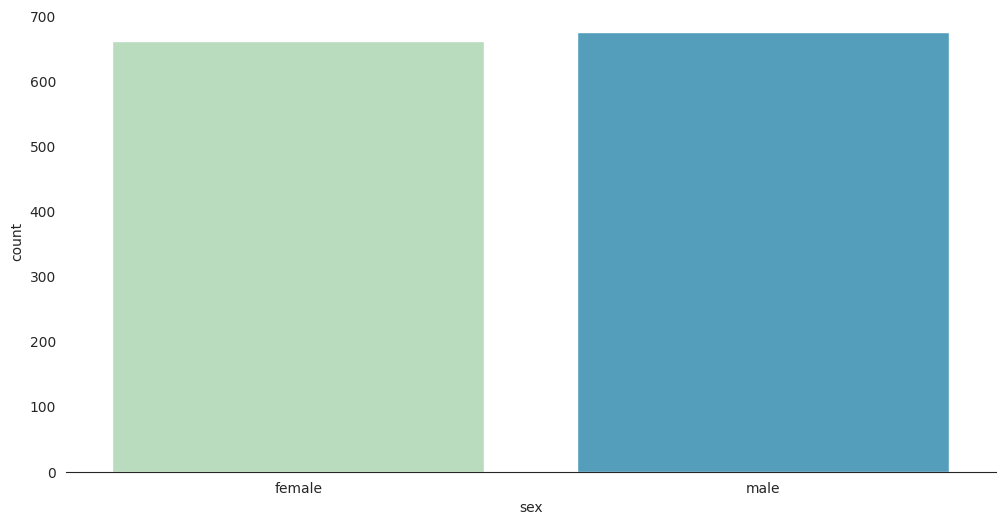

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.set_style("white")
sns.countplot(x="sex",data=df,palette="GnBu")
sns.despine(left=True)

Relation of smoking and gender with charges

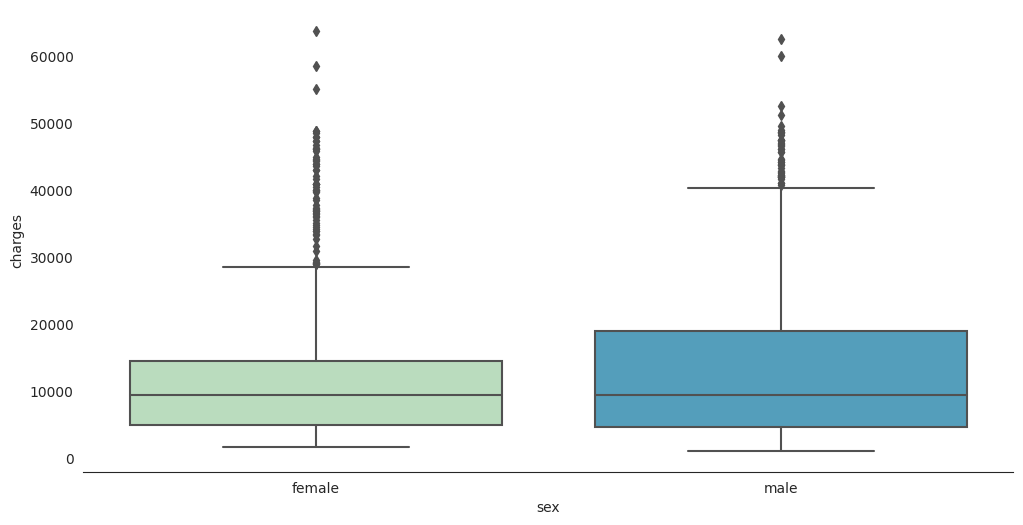

In [11]:
plt.figure(figsize=(12,6))
sns.set_style("white")
sns.boxplot(x="sex",y="charges",data=df,palette="GnBu")
sns.despine(left=True)

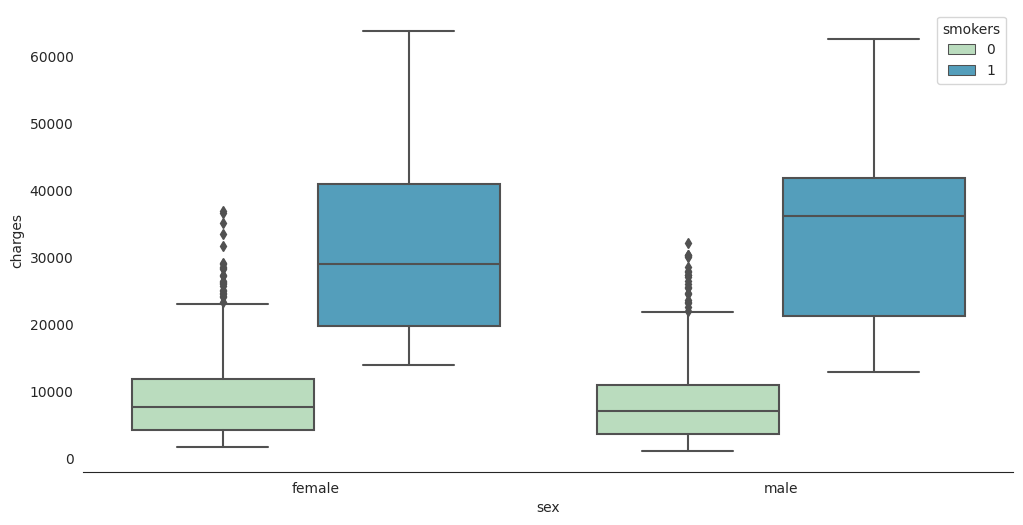

In [12]:
plt.figure(figsize=(12,6))
sns.set_style("white")
sns.boxplot(x="sex",y="charges",data=df,palette="GnBu",hue="smokers")
sns.despine(left=True)

<Axes: xlabel='age', ylabel='charges'>

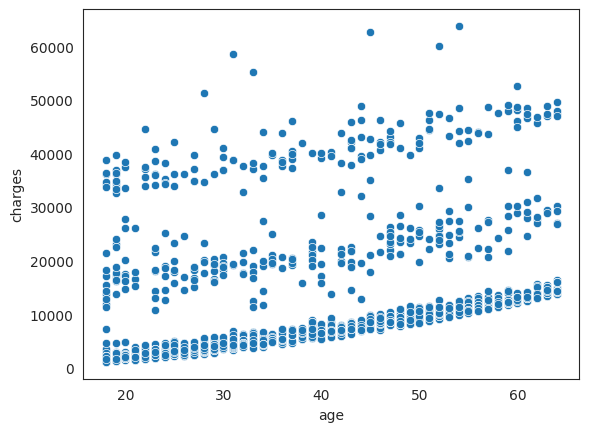

In [13]:
sns.scatterplot(x="age",y="charges",data=df)

<Axes: xlabel='age', ylabel='charges'>

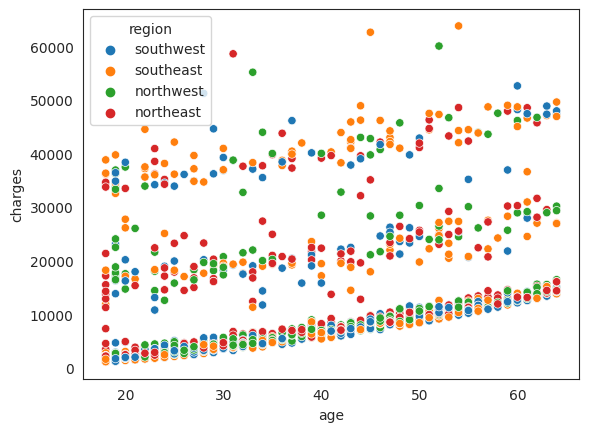

In [14]:
sns.scatterplot(x="age",y="charges",data=df,hue="region")

<Axes: xlabel='age', ylabel='charges'>

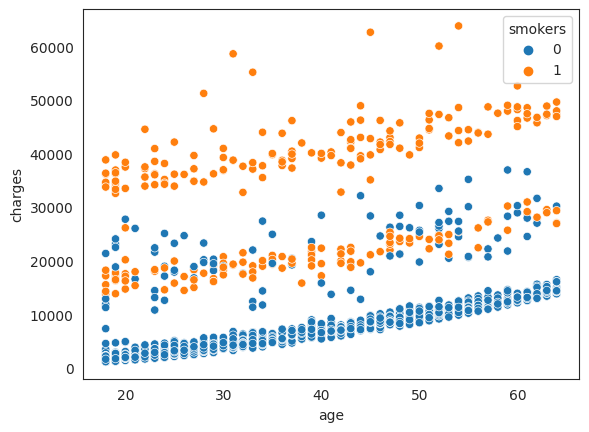

In [15]:
sns.scatterplot(x="age",y="charges",data=df,hue="smokers")

<Axes: xlabel='bmi', ylabel='charges'>

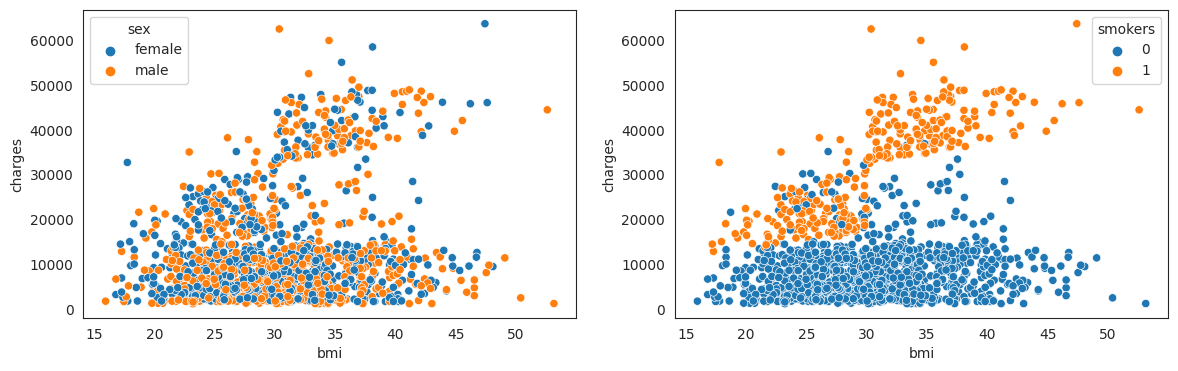

In [16]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(14,4))
sns.scatterplot(x="bmi",y="charges",data=df,hue="sex",ax=ax[0])
sns.scatterplot(x="bmi",y="charges",data=df,hue="smokers",ax=ax[1])


In [17]:
df['region']=le.fit_transform(df['region'])
df.drop(columns=['sex'],inplace=True)
df

,age,bmi,children,region,charges,male,smokers
0,19,27.900,0,3,16884.92400,0,1
1,18,33.770,1,2,1725.55230,1,0
2,28,33.000,3,2,4449.46200,1,0
3,33,22.705,0,1,21984.47061,1,0
4,32,28.880,0,1,3866.85520,1,0
...,...,...,...,...,...,...,...
1333,50,30.970,3,1,10600.54830,1,0
1334,18,31.920,0,0,2205.98080,0,0
1335,18,36.850,0,2,1629.83350,0,0
1336,21,25.800,0,3,2007.94500,0,0


In [18]:
df.corr()

,age,bmi,children,region,charges,male,smokers
age,1.000000,0.109272,0.042469,0.002127,0.299008,-0.020856,-0.025019
bmi,0.109272,1.000000,0.012759,0.157566,0.198341,0.046371,0.003750
children,0.042469,0.012759,1.000000,0.016569,0.067998,0.017163,0.007673
region,0.002127,0.157566,0.016569,1.000000,-0.006208,0.004588,-0.002181
charges,0.299008,0.198341,0.067998,-0.006208,1.000000,0.057292,0.787251
male,-0.020856,0.046371,0.017163,0.004588,0.057292,1.000000,0.076185
smokers,-0.025019,0.003750,0.007673,-0.002181,0.787251,0.076185,1.000000


<Axes: >

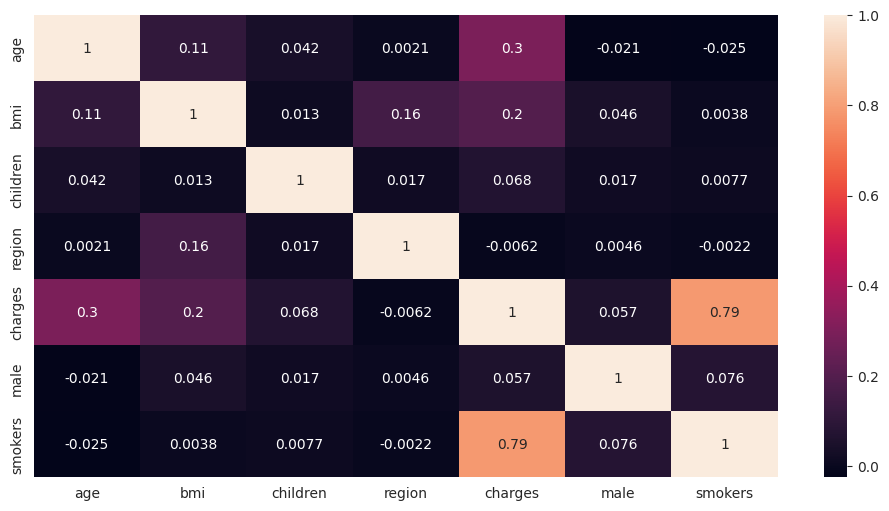

In [19]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)

Splitting the data

In [20]:
x=df.drop(columns=['charges'],axis=1)
y=df['charges']

In [21]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.4)
xtrain.shape
ytrain.shape

(802,)

Sacling the data

In [22]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

scaled_xtrain=scaler.fit_transform(xtrain)


In [23]:
scaled_xtest=scaler.transform(xtrain)

Support vector Model

In [24]:
from sklearn.svm import SVR

regressor=SVR()
regressor.fit(scaled_xtrain,ytrain)

SVR()

In [25]:
pred=regressor.predict(scaled_xtest)
pred[:10]

array([9297.56000535, 9273.71360608, 9370.03931342, 9329.34196668,
       9278.98126429, 9345.99332793, 9292.85171309, 9381.51657541,
       9281.90815243, 9297.29082777])

In [26]:
y[:10]

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
5     3756.62160
6     8240.58960
7     7281.50560
8     6406.41070
9    28923.13692
Name: charges, dtype: float64